# Hands-On Section (HW2)
## Fitting models and overfitting  + using scripts




### Downloading & Installing Packages
**READ THIS OR YOU WILL GET ERRORS**

There are some packages that will be required for this assignment that are no pre-loaded into Jupyter hub. You can install them following the instructions below.

Enter the following commands into jupyter's terminal one at a time:
```
sudo pip install liac-arff
sudo apt install graphviz
sudo pip install graphviz
sudo pip install pydotplus
```
enter "`Y`" when promted.

# Hands-On Section (HW2)
Import the churn training and test data in the data folder with pandas' read_csv function


In [2]:
! sudo pip install liac-arff

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
  Running setup.py install for liac-arff ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.utils import shuffle
import arff

In [4]:
arff_train = arff.load(open('data/churn2_train.arff'))
train = pd.DataFrame(arff_train['data'])
train.head()

0         1      2     3         4      5     6     7           8   \
0   one  119070.0   25.0  17.0  179158.0  541.0   4.0   4.0  very_unsat   
1   one   40157.0   53.0   0.0  972459.0  220.0  26.0   8.0       unsat   
2  zero  116959.0  211.0   0.0  245177.0  895.0  15.0  15.0    very_sat   
3   one   21118.0   52.0   7.0  413655.0  205.0   3.0   5.0    very_sat   
4   one   58114.0  154.0  50.0  258444.0  334.0  26.0   1.0       unsat   

            9                         10    11     12  
0  very_little  actively_looking_into_it  3.42  LEAVE  
1         high               considering  5.35   STAY  
2  very_little  actively_looking_into_it  3.51  LEAVE  
3       little                        no  4.21  LEAVE  
4         high               considering  3.14  LEAVE

In [5]:
arff_train['attributes']

[('COLLEGE', ['zero', 'one']),
 ('INCOME', 'NUMERIC'),
 ('OVERAGE', 'NUMERIC'),
 ('LEFTOVER', 'NUMERIC'),
 ('HOUSE', 'NUMERIC'),
 ('HANDSET_PRICE', 'NUMERIC'),
 ('OVER_15MINS_CALLS_PER_MONTH', 'NUMERIC'),
 ('AVERAGE_CALL_DURATION', 'NUMERIC'),
 ('REPORTED_SATISFACTION', ['very_unsat', 'unsat', 'very_sat', 'sat', 'avg']),
 ('REPORTED_USAGE_LEVEL',
  ['very_little', 'high', 'little', 'avg', 'very_high']),
 ('CONSIDERING_CHANGE_OF_PLAN',
  ['actively_looking_into_it',
   'considering',
   'no',
   'perhaps',
   'never_thought']),
 ('PROFITABILITY', 'NUMERIC'),
 ('LEAVE', ['LEAVE', 'STAY'])]

In [6]:
# let's give the columns their proper names
a = arff_train['attributes']
train.columns = [i[0] for i in a] 
train.head()

COLLEGE    INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0     one  119070.0     25.0      17.0  179158.0          541.0   
1     one   40157.0     53.0       0.0  972459.0          220.0   
2    zero  116959.0    211.0       0.0  245177.0          895.0   
3     one   21118.0     52.0       7.0  413655.0          205.0   
4     one   58114.0    154.0      50.0  258444.0          334.0   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                          4.0                    4.0            very_unsat   
1                         26.0                    8.0                 unsat   
2                         15.0                   15.0              very_sat   
3                          3.0                    5.0              very_sat   
4                         26.0                    1.0                 unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  PROFITABILITY  LEAVE  
0          very_little   actively_looking_into_it           3.42  LEAVE  
1                 high                considering           5.35   STAY  
2          very_little   actively_looking_into_it           3.51  LEAVE  
3               little                         no           4.21  LEAVE  
4                 high                considering           3.14  LEAVE

### Fitting the Decision Tree
In Weka we used the J48 algorithm that implements the C4.5 algorithm. Sklearn instead uses the CART algorithm which does not work with categorical or nominal data. Let us convert each of these categorical variables to numeric variables.

In [7]:
#look at the values present in each of the categorical columns (float)
print(train['COLLEGE'].unique())
print(train['REPORTED_SATISFACTION'].unique())
print(train['REPORTED_USAGE_LEVEL'].unique())
print(train['CONSIDERING_CHANGE_OF_PLAN'].unique())
print(train['LEAVE'].unique())


['one' 'zero']
['very_unsat' 'unsat' 'very_sat' 'sat' 'avg']
['very_little' 'high' 'little' 'avg' 'very_high']
['actively_looking_into_it' 'considering' 'no' 'perhaps' 'never_thought']
['LEAVE' 'STAY']


In [8]:
train.head()

COLLEGE    INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0     one  119070.0     25.0      17.0  179158.0          541.0   
1     one   40157.0     53.0       0.0  972459.0          220.0   
2    zero  116959.0    211.0       0.0  245177.0          895.0   
3     one   21118.0     52.0       7.0  413655.0          205.0   
4     one   58114.0    154.0      50.0  258444.0          334.0   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                          4.0                    4.0            very_unsat   
1                         26.0                    8.0                 unsat   
2                         15.0                   15.0              very_sat   
3                          3.0                    5.0              very_sat   
4                         26.0                    1.0                 unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  PROFITABILITY  LEAVE  
0          very_little   actively_looking_into_it           3.42  LEAVE  
1                 high                considering           5.35   STAY  
2          very_little   actively_looking_into_it           3.51  LEAVE  
3               little                         no           4.21  LEAVE  
4                 high                considering           3.14  LEAVE

In [9]:
# give these all numeric labels now: 

# create a dictionary mapping each string to a value
to_replace = {'COLLEGE':{'one':1,'zero':0},
           'REPORTED_SATISFACTION':{'very_unsat':-2,'unsat':-1,'avg':0,'sat':1,'very_sat':2},
           'REPORTED_USAGE_LEVEL':{'very_little':-2,'little':-1,'avg':0,'high':1,'very_high':2},
           'CONSIDERING_CHANGE_OF_PLAN':{'no':-2,'never_thought':-1,'perhaps':0,'considering':1,'actively_looking_into_it':2},
           'LEAVE':{'LEAVE':1,'STAY':0}
          }

train = train.replace(to_replace)

# note that if you run this cell twice it will crash. If this crashes for you reload the churn data.

In [10]:
train.head()

COLLEGE    INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1  119070.0     25.0      17.0  179158.0          541.0   
1        1   40157.0     53.0       0.0  972459.0          220.0   
2        0  116959.0    211.0       0.0  245177.0          895.0   
3        1   21118.0     52.0       7.0  413655.0          205.0   
4        1   58114.0    154.0      50.0  258444.0          334.0   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  REPORTED_SATISFACTION  \
0                          4.0                    4.0                     -2   
1                         26.0                    8.0                     -1   
2                         15.0                   15.0                      2   
3                          3.0                    5.0                      2   
4                         26.0                    1.0                     -1   

   REPORTED_USAGE_LEVEL  CONSIDERING_CHANGE_OF_PLAN  PROFITABILITY  LEAVE  
0                    -2                           2           3.42      1  
1                     1                           1           5.35      0  
2                    -2                           2           3.51      1  
3                    -1                          -2           4.21      1  
4                     1                           1           3.14      1

In [11]:
Y_train = train["LEAVE"] #Got LEAVE column
X_train = train.loc[:, train.columns != "LEAVE"] #Got everything excluding LEAVE column

my_tree = DecisionTreeClassifier() #Specify the model
my_tree.fit(X_train,Y_train) #fit the model 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now let's import the test data and transform it in the same way

In [12]:
arff_test = arff.load(open('data/churn2_test.arff'))
test = pd.DataFrame(arff_test['data'])
a = arff_test['attributes']
test.columns = [i[0] for i in a] 
test = test.replace(to_replace)
Y_test = test["LEAVE"]
X_test = test.loc[:, test.columns != "LEAVE"]

test.head()

COLLEGE    INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        0  100548.0     49.0       8.0  668230.0          848.0   
1        1   31872.0     58.0       0.0  280278.0          150.0   
2        1   59197.0     58.0      23.0  590473.0          300.0   
3        1  155244.0      0.0      22.0  432265.0          498.0   
4        0  132197.0    204.0      39.0  360448.0          794.0   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  REPORTED_SATISFACTION  \
0                          4.0                    5.0                      2   
1                          3.0                   10.0                     -1   
2                          5.0                    5.0                     -2   
3                          1.0                    4.0                     -2   
4                         21.0                    1.0                     -2   

   REPORTED_USAGE_LEVEL  CONSIDERING_CHANGE_OF_PLAN  PROFITABILITY  LEAVE  
0                     2                          -2           2.61      1  
1                    -1                          -2           3.42      0  
2                     1                          -2           2.27      0  
3                     1                           2           5.66      0  
4                    -2                           2           3.13      1

## Deliverable #1: Accuracy and Cross-validation
Report the accuracy of the classifier on:
- the training data
- the test set churn2_test.arff
- 10-fold cross-validation
- 66% train 34% split of the training data

In [13]:
metrics.accuracy_score(my_tree.predict(X_test), Y_test)

0.611

In [14]:
cross_val_score(my_tree, X_train, Y_train, cv=10) #10 cuts

array([0.61292472, 0.62958028, 0.62025316, 0.61133333, 0.616     ,
       0.61733333, 0.622     , 0.60907272, 0.60707138, 0.61307538])

In [15]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train, Y_train, test_size=0.33)

In [16]:
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

(10050, 12)
(10050,)
(4950, 12)
(4950,)


In [19]:
# accuracy on the training data:
acc_train = my_tree.score(X_train, Y_train) #my_tree is a shell, we specify the training data here

# accuracy on the test data:
acc_test = my_tree.score(X_test, Y_test)

# accuracy on 10-fold CV:
# hint: use model_selection.cross_val_score() with cv = 10 
acc_10cv = np.mean(cross_val_score(my_tree, X_train, Y_train, cv=10)) 

# accuracy on 66% split of training data:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train, Y_train, test_size=0.33) # Split the dataset 66/33

my_tree66 = DecisionTreeClassifier() #Specify and fit the model use 66% training data
my_tree66.fit(X_train2,Y_train2)

acc_66pct = my_tree66.score(X_test2, Y_test2)

print("accuracy on the training data : " + str(round(acc_train, 4)))
print("accuracy on the test data     : " + str(round(acc_test, 4)))
print("accuracy on the 10-fold CV    : " + str(round(acc_10cv, 4)))
print("accuracy on the 66% split     : " + str(round(acc_66pct, 4)))


accuracy on the training data : 1.0
accuracy on the test data     : 0.611
accuracy on the 10-fold CV    : 0.6157
accuracy on the 66% split     : 0.6186


## Deliverable #2.1: Construct a Fitting Curve
One way to control the complexity is by setting the depth as shown above. Another way, as shown in class is by choosing different values for the minimum number of training instances in each leaf of the tree. In sklean's DecisionTreeClassifier this parameter is called "min_samples_leaf".

- Plot a fitting curve for the train set, test set, and 3-fold cross validation with a range of values for max_depth to find the optimal complexity. 
- Next, repeat the above with a range of values for **min_samples_leaf** to find the optimal complexity. 



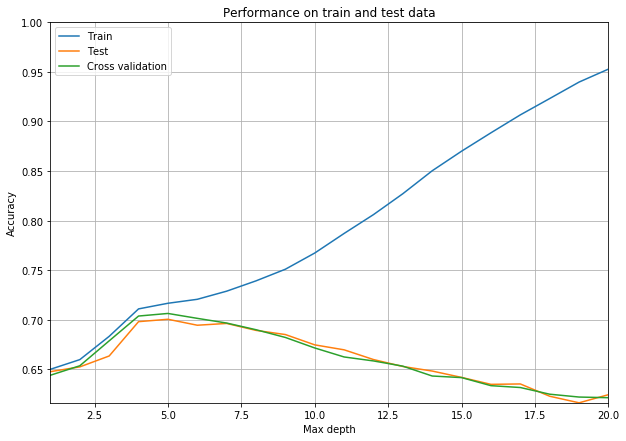

In [20]:
#1.0) plotting the training set and test set fitting curve for max depth
accuracies_train = []
accuracies_test = []
accuracies_cv = []
maxdepth = 20
depths = range(1, maxdepth+1)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))
    accuracies_cv.append(np.mean(cross_val_score(model, X_train, Y_train,cv=3)))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.plot(depths, accuracies_cv, label="Cross validation")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_test), 1.0])
plt.xlim([1,maxdepth])
plt.legend()
plt.grid()
plt.show()

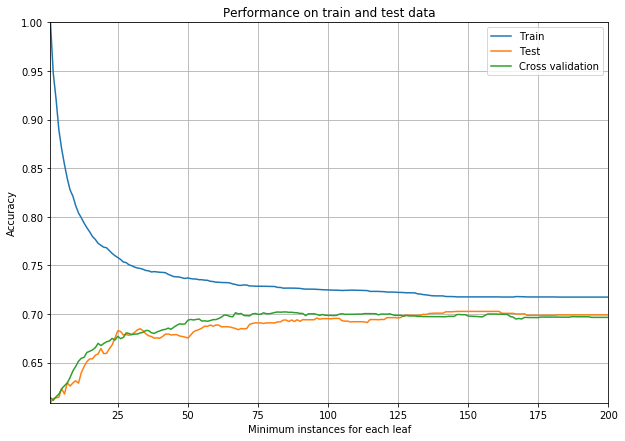

In [21]:
#2.0) plotting the training set and test set fitting curve for minimum number of training instances in each leaf
accuracies_train = []
accuracies_test = []
accuracies_cv = []
min_leaf_instances = 200
leaf_instances = range(1, min_leaf_instances+1)

plt.figure(figsize=[10,7])

for i in leaf_instances:
    model = DecisionTreeClassifier(min_samples_leaf=i)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))
    accuracies_cv.append(np.mean(cross_val_score(model, X_train, Y_train,cv=3)))


plt.plot(leaf_instances, accuracies_train, label="Train")
plt.plot(leaf_instances, accuracies_test, label="Test")
plt.plot(leaf_instances, accuracies_cv, label="Cross validation")
plt.title("Performance on train and test data")
plt.xlabel("Minimum instances for each leaf")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_test), 1.0])
plt.xlim([1,min_leaf_instances])
plt.legend()
plt.grid()
plt.show()

## Deliverable #2.2: Evaluation
Based on the above graphs:
- What value would you use for max depth?
- What value would you use for min leaf size?
- Which complexity parameter would you choose (max depth or min leaf size)?


### Answer:

1. Max depth = 5, a clear optimal based on the graph
2. Min leaf size = Anything near 150 does well for both test and CV, not a huge difference. 
3. I would use max_depth, there is a clear fall off in test accuracy after 5 while min leaf size stabalizes at anything greater than ~75.

## Deliverable #2.3: Learning Curves
Learning curves determine how much data you realistically need to train your model.
* Randomize the rows
* Use train_test_split () to select a range of percentages of the training data to use to fit the model
* Plot training size vs. accuracy on the test, train, and 3-fold cv

The X-axis of your chart should be "number for instances used"

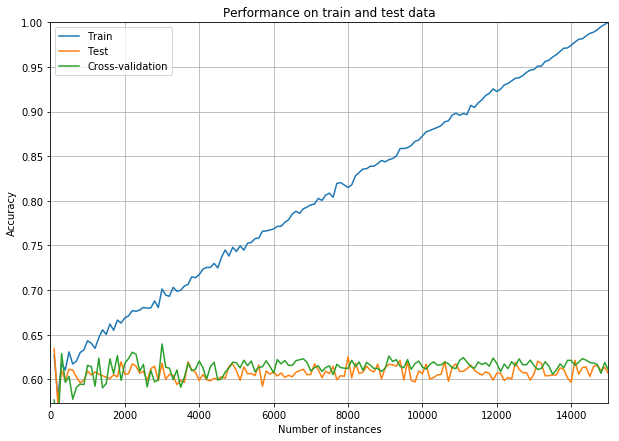

In [23]:
#Learning Curves
accuracies_train = []
accuracies_test = []
accuracies_cv = []
rangedata = range(100,15001,100) #start at 100 to avoid 0 array
percent_range = [data/15001 for data in rangedata]


plt.figure(figsize=[10,7])

for i in percent_range:
    train1 = shuffle(train) #randomnize selection
    Y_train_rand = train1["LEAVE"]
    X_train_rand = train1.loc[:, train1.columns != "LEAVE"] 
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_train_rand, Y_train_rand, test_size=1-i) #only really need traindata
    my_treelearning = DecisionTreeClassifier()
    my_treelearning.fit(X_train3, Y_train3) #fitting against the for-loop data 
    
    
    accuracies_train.append(metrics.accuracy_score(my_treelearning.predict(X_train), Y_train)) #accuracy against all training data
    accuracies_test.append(metrics.accuracy_score(my_treelearning.predict(X_test), Y_test)) #accuracy against all test data
    accuracies_cv.append(np.mean(cross_val_score(my_treelearning, X_train3, Y_train3, cv=3))) #cv with training data

plt.plot(rangedata, accuracies_train, label="Train")
plt.plot(rangedata, accuracies_test, label="Test")
plt.plot(rangedata, accuracies_cv, label="Cross-validation")
plt.title("Performance on train and test data")
plt.xlabel("Number of instances")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_test), 1.0])
plt.xlim(1,15001)
plt.legend()
plt.grid()
plt.show()

## Deliverable #3.1: Evaluation
Would you recommend your firm spend money to collect data on more customers?


### Answer:

Based on this learning curve, I would not. While both test and cross-validation seem to have lower variance in their accuracy as the number of instances increase, the improvement really tapers down after 2,000 instances. It is likely that the accuracy will hover around 0.6 even if the company spend more to collect above 15,000 instances.

## Deliverable #3: Interpreting Trees
Build and show a tree that is small enough to plot.
(Use the package graphviz to plot the tree)

In [57]:
def Decision_Tree_Image(decision_tree, feature_names, class_names, name="tree",proportion=True):
    
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree, out_file='images/' + name + '.dot', 
                                    feature_names=feature_names, class_names=class_names,proportion=proportion)
        
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    # to get this part to actually work, you may need to open a terminal window in Jupyter and run the following command "sudo apt install graphviz"
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')


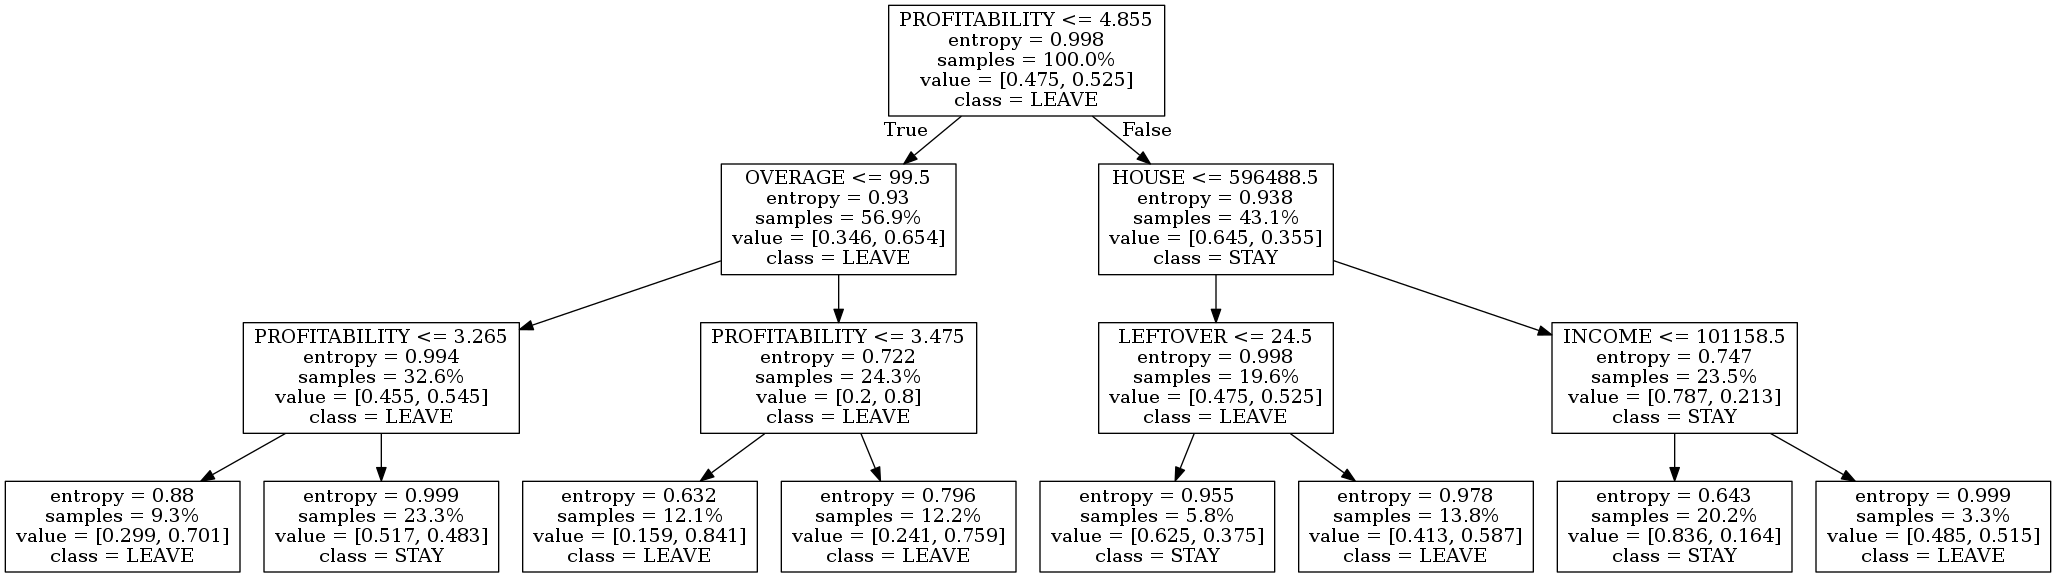

In [62]:
# Let's define the model (tree)
my_tree_test = DecisionTreeClassifier(max_depth=3, criterion="entropy")   # Look at those 2 arguments !!! 

# Let's tell the model what is the data
my_tree_test.fit(X_train, Y_train)

#Let's print an image with the results
Decision_Tree_Image(my_tree_test, X_train.columns, class_names =['STAY','LEAVE'])

Which attribute is most informative?

Profitability <= 4.855

This feature was chosen because the DecisionTreeClassifer looked through all the possible splits, and found "Profitability <= 4.855" to produce the largest information gain (reducing entropy the most). This means that "Profitability <= 4.855" is the most informative avaliable attribute in determining whether a person will leave or stay.


Explain in 2-3 sentences why that feature was chosen.